# Graham Scan Algorithm

In [1]:
# Importing libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import randint
from math import atan2

In [18]:
# Plotting Convex Hulls and Pixels

def plot_hull(pixels,convex_hull,N):
    x,y=zip(*pixels)
    plt.scatter(x,y)
    
    for i in range(1,len(convex_hull)+1):
        if i==len(convex_hull):
            i=0
        cx=convex_hull[i-1]
        cy=convex_hull[i]
        plt.plot((cx[0],cy[0]),(cx[1],cy[1]),'r')
        title="Convex Hull for contour "+str(N)
    plt.title(title)    
    plt.show()

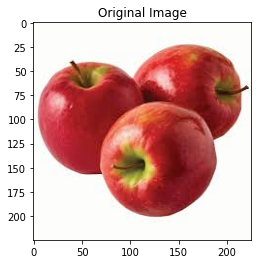

In [3]:
# Reading Input Image

im=im=cv2.imread('/home/shagun/Downloads/apple.jpeg')

def display(img,title="Original Image"):
    img = cv2.cvtColor(np.uint8(img), cv2.COLOR_BGR2RGB)
    plt.imshow(img,cmap='gray'),plt.title(title)
    plt.show()
    
display(im)

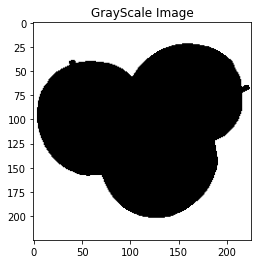

In [4]:
# Binarizing the input image

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_blur = cv2.blur(im_gray, (3, 3))
ret, thresh = cv2.threshold(im_blur, 232, 255, cv2.THRESH_BINARY)
display(thresh,"GrayScale Image")

In [5]:
# Finding Contours in the image

contours,hierarchy= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 2


### Implementing Graham Scan Algorithm

In [6]:
# Calculating Polar Angle

def angle(p1,p2=None):
    if p2==None:
        p2=lowest
    x_span=p1[0]-p2[0]
    y_span=p1[1]-p2[1]
    return atan2(y_span,x_span)

In [7]:
# Calculating Distance

def distance(p1,p2=None):
    if p2==None:
        p2=lowest
    x_span=p1[0]-p2[0]
    y_span=p1[1]-p2[1]
    return x_span**2+y_span**2

In [8]:
# Determining direction by calculating determinant

def determinant(p1,p2,p3):
    return (p2[0]-p1[0])*(p3[1]-p1[1])-(p2[1]-p1[1])*(p3[0]-p1[0])

In [9]:
# Function for sorting points

def sort(arr):
    if len(arr)<=1: 
        return arr
    smaller,equal,larger=[],[],[]
    piv_ang=angle(arr[randint(0,len(arr)-1)]) 
    for pt in arr:
        pt_ang=angle(pt) 
        if   pt_ang<piv_ang:  
            smaller.append(pt)
        elif pt_ang==piv_ang: 
            equal.append(pt)
        else: 
            larger.append(pt)
    return sort(smaller)+sorted(equal,key=distance)+sort(larger)

In [16]:
# Graham Scan Algorithm

def graham_scan(points,N):
    global lowest 
    
    # Finding the pixel with lowest y co-ordinate
    min_idx=0
    for i,(x,y) in enumerate(points):
        if y<points[min_idx][1] or y==points[min_idx][1] and x<points[min_idx][0]:
            min_idx=i
    
    lowest=points[min_idx]
    sorted_pts=sort(points)
    del sorted_pts[sorted_pts.index(lowest)]

    hull=[lowest,sorted_pts[0]]
    for s in sorted_pts[1:]:
        while determinant(hull[-2],hull[-1],s)<=0:
            del hull[-1] 
        hull.append(s)
    plot_hull(points,hull,N)
    return hull

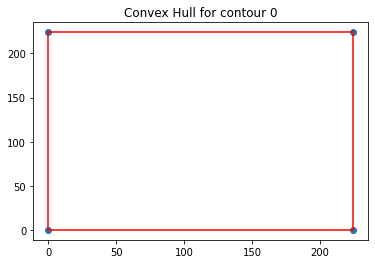

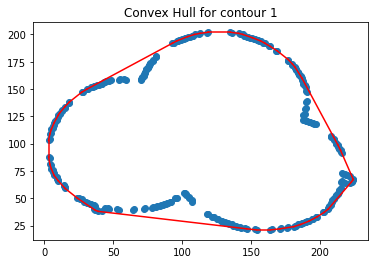

In [19]:
# Finding Convex Hull for every Contour

hull=[]
for i in range(len(contours)):
    pixels_list=[]
    for j in range(len(contours[i])):
        pixels_list.append([contours[i][j][0][0],contours[i][j][0][1]])
    temp=graham_scan(pixels_list,i)
    hull.append(temp)